In [130]:
import requests
import pandas as pd
import numpy as np
from pandas import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
### Function to Load the Data from the respective API's
def load_data(quiz_api,submission_api,historical_api):
    """
        This function fetches data from three different APIs.

        Args:
            quiz_api (str): The URL of the quiz API.
            submission_api (str): The URL of the submission API.
            historical_api (str): The URL of the historical quiz API.

        Returns:
        quiz data, submission data, and historical quiz data as JSON objects.
    """
    try:
        quiz_data=requests.get(quiz_api,verify=False).json()
        submission_data=requests.get(submission_api,verify=False).json()
        historical_quiz_data=requests.get(historical_api,verify=False).json()
    except requests.exceptions.RequestException as e:
        print(f"Can't fetech data :{e}")
        return None,None,None

    return quiz_data,submission_data,historical_quiz_data

In [192]:
# Define API URLs
quiz_api="https://jsonkeeper.com/b/LLQT"
submission_api="https://api.jsonserve.com/rJvd7g"
historical_api="https://api.jsonserve.com/XgAgFJ"

# Call the function to load data
quiz_data, submission_data, historical_quiz_data=load_data(quiz_api,submission_api,historical_api)

if quiz_data and submission_data and historical_quiz_data:
     print("Data loaded successfully")
else:
     print("There was an issue loading the data")

/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/urllib3/connectionpool.py:1107: InsecureRequestWarning: Unverified HTTPS request is being made to host 'jsonkeeper.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  InsecureRequestWarning,
/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/urllib3/connectionpool.py:1107: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.jsonserve.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  InsecureRequestWarning,
/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/urllib3/connectionpool.py:1107: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.jsonserve.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  InsecureRequestWarn

Data loaded successfully


### Data Preprocessing

In [193]:
### Function to convert into dataframe
def normalize_data(data):
     """
          Normalizes nested JSON data into a pandas DataFrame.

          Args:
          data: A dictionary or a list of dictionaries.

          Returns:
          pandas.DataFrame: The normalized DataFrame.
          pd.DataFrame(): An empty DataFrame if the input data is not a dictionary or a list.
    """
     if type(data) is dict:
          return json_normalize([data],sep='_')
     elif type(data) is list:
          return json_normalize(data,sep='_')
     return pd.DataFrame()


In [194]:
quiz_data=normalize_data(quiz_data)
submission_data=normalize_data(submission_data)
historical_quiz_data=normalize_data(historical_quiz_data)

In [361]:
## Function to Handle missing values
def check_missing_values(data_frame):
     """
        Checks for missing values in the DataFrame and drops rows containing any missing values.

        Args:
        data_frame: The input DataFrame.

        Returns:
         A new DataFrame with rows containing missing values imputed.
    """
     if data_frame.isna().values.any():
          updated_data_frame=data_frame.fillna(0)
     else:
        updated_data_frame = data_frame
     return updated_data_frame

In [206]:
quiz_data_df=check_missing_values(quiz_data)
submission_data_df=check_missing_values(submission_data)
historical_quiz_data_df=check_missing_values(historical_quiz_data)


#### View Data

In [208]:
quiz_data_df

,quiz_id,quiz_name,quiz_title,quiz_description,quiz_difficulty_level,quiz_topic,quiz_time,quiz_is_published,quiz_created_at,quiz_updated_at,...,quiz_exam_id,quiz_show_unanswered,quiz_ends_at,quiz_lives,quiz_live_count,quiz_coin_count,quiz_questions_count,quiz_daily_date,quiz_max_mistake_count,quiz_questions
0,43,0,Structural Organisation in Animals and Plants (7),,0,Structural Organisation in Animals,2024-07-03T00:00:00.000+05:30,True,2024-07-03T11:00:08.958+05:30,2024-09-23T18:43:27.751+05:30,...,0,False,2025-01-18,0,Free Test,-1,128,"January 17, 2025",15,"[{'id': 1827, 'description': 'The tissue which..."


In [209]:
submission_data_df

,id,quiz_id,user_id,submitted_at,created_at,updated_at,score,trophy_level,accuracy,speed,...,quiz_exam_id,quiz_show_unanswered,quiz_ends_at,quiz_lives,quiz_live_count,quiz_coin_count,quiz_questions_count,quiz_daily_date,quiz_max_mistake_count,quiz_reading_materials
0,336566,43,7ZXdz3zHuNcdg9agb5YpaOGLQqw2,2025-01-17T15:51:29.859+05:30,2025-01-17T15:51:29.871+05:30,2025-01-17T15:51:29.871+05:30,32,2,80 %,100,...,0,False,2025-01-18,0,Free Test,-1,128,"January 17, 2025",15,[]


In [211]:
historical_quiz_data_df

,id,quiz_id,user_id,submitted_at,created_at,updated_at,score,trophy_level,accuracy,speed,...,response_map_3194,response_map_2417,response_map_2425,response_map_2435,response_map_2440,response_map_2444,response_map_2452,response_map_2459,response_map_2469,response_map_2515
0,336497,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-17T15:30:18.027+05:30,2025-01-17T15:30:18.044+05:30,2025-01-17T15:30:18.044+05:30,108,2,90 %,100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,336448,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-17T15:17:44.042+05:30,2025-01-17T15:17:44.056+05:30,2025-01-17T15:17:44.056+05:30,92,1,100 %,100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,333330,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-16T20:13:19.682+05:30,2025-01-16T20:13:19.699+05:30,2025-01-16T20:13:19.699+05:30,116,2,96 %,100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,333242,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-16T20:00:11.562+05:30,2025-01-16T20:00:11.573+05:30,2025-01-16T20:00:11.573+05:30,36,2,90 %,100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,329504,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-15T20:34:39.462+05:30,2025-01-15T20:34:39.478+05:30,2025-01-15T20:34:39.478+05:30,36,3,31 %,96,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,328488,57,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-15T15:57:12.791+05:30,2025-01-15T15:57:12.800+05:30,2025-01-15T15:57:12.800+05:30,40,3,38 %,86,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,328414,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-15T15:36:46.410+05:30,2025-01-15T15:36:46.420+05:30,2025-01-15T15:36:46.420+05:30,36,3,50 %,78,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,321514,20,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-13T16:10:03.743+05:30,2025-01-13T16:10:03.753+05:30,2025-01-13T16:10:03.753+05:30,12,2,30 %,100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,320963,24,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-13T13:28:12.784+05:30,2025-01-13T13:28:12.795+05:30,2025-01-13T13:28:12.795+05:30,76,2,100 %,95,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,320916,18,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-13T13:12:40.687+05:30,2025-01-13T13:12:40.695+05:30,2025-01-13T13:12:40.695+05:30,40,1,100 %,100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Tasks

### 1) *********************** Analyze the Data ***********************
  Identify Schema and Patterns in Student Performance by 
   1. Performance by Topics : Performance of a student in different topics
   2. Performance by Difficulty levels : Questions with varying difficulty
   3. Performance by Response accuracy : refers to how correctly a student answers quiz questions.It can vary depending on several factors

#### 1. Performance by Topics

In [212]:

# Groupby the topics and calculate average score
topic_performance=submission_data_df.groupby('quiz_topic')['final_score'].mean()
# check for multiple topics
mul_topics=submission_data_df['quiz_topic'].nunique()

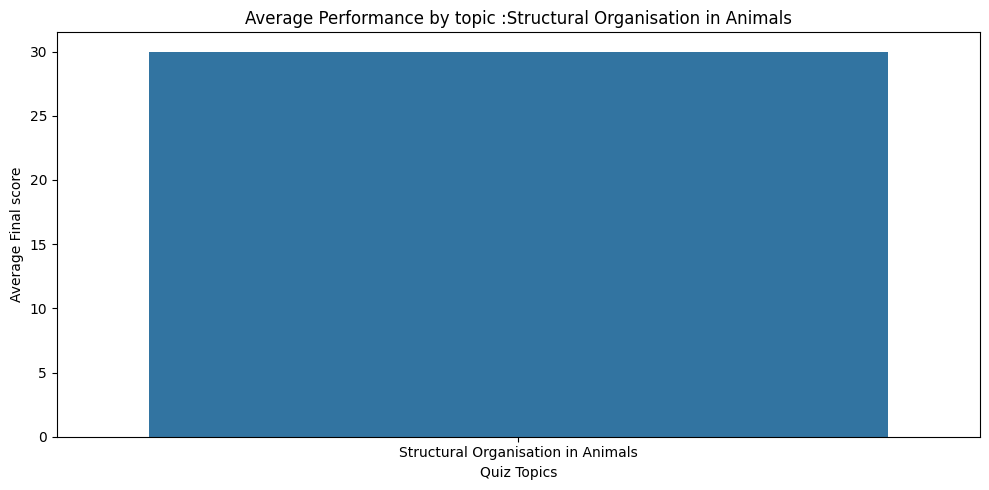

In [213]:
# Plotting
plt.figure(figsize=(10,5))

if mul_topics >1:
     sns.barplot(x=topic_performance.index,y=topic_performance.values)
     plt.title("Average Performance by topic")
     plt.xlabel('Quiz Topics')
     plt.ylabel('Average Final score')
     plt.xticks(rotation=50,ha='right')
else:
     sns.barplot(x=topic_performance.index,y=topic_performance.values)
     plt.title(f"Average Performance by topic :{topic_performance.index[0]}")
     plt.xlabel('Quiz Topics')
     plt.ylabel('Average Final score')

plt.tight_layout()
plt.show()


#### 2. Performance by Difficulty Levels

In [214]:

# Groupby the categories for performance by various levels
difficulty_levels=submission_data_df.groupby('trophy_level')['final_score'].mean()
# check for multiple topics
mul_levels=submission_data_df['trophy_level'].nunique()

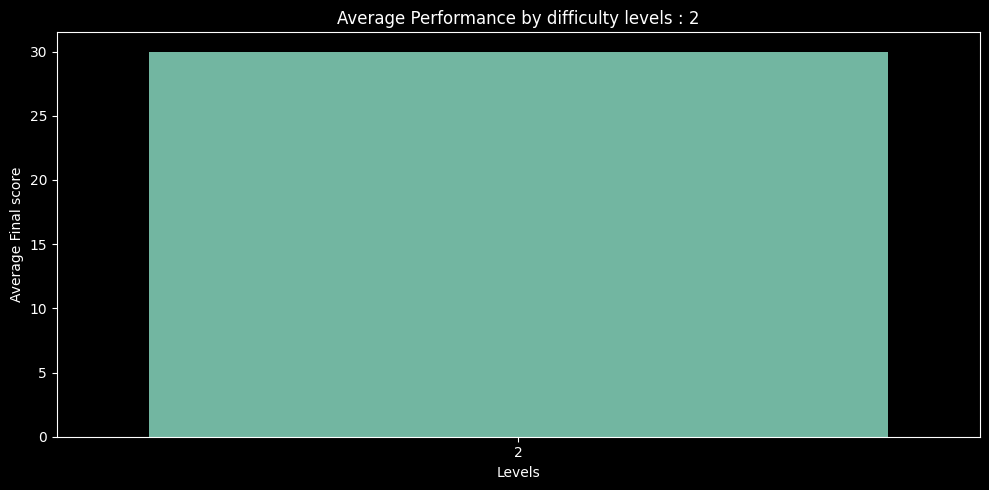

In [394]:
# Plotting
plt.figure(figsize=(10,5))

if mul_levels >1:
     sns.barplot(x=difficulty_levels.index,y=difficulty_levels.values)
     plt.title("Average Performance by difficulty levels")
     plt.xlabel('Levels')
     plt.ylabel('Average Final score')
     plt.xticks(rotation=50,ha='right')
else:
     sns.barplot(x=difficulty_levels.index,y=difficulty_levels.values)
     plt.title(f"Average Performance by difficulty levels : {difficulty_levels.index[0]}")
     plt.xlabel('Levels')
     plt.ylabel('Average Final score')

plt.tight_layout()
plt.show()

#### 3. Performance by Response Accuracy 

#### ----To visualize overall accuracy over different levels with historical data----

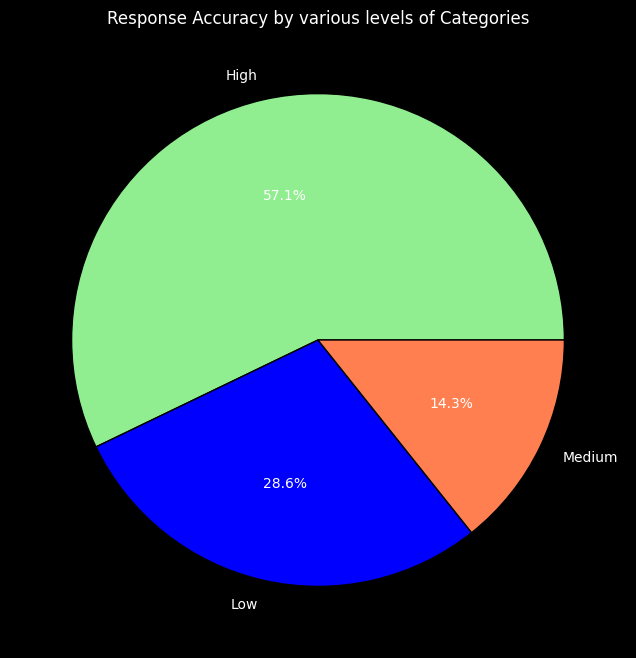

In [298]:

# To visualize overall accuracy over different levels 
# Convert the accuracy to Numeric value
historical_quiz_data_df['accuracy']=historical_quiz_data_df['accuracy'].str.replace('%','').astype(float)
conditions=[
      (historical_quiz_data_df['accuracy']>=80),
      (historical_quiz_data_df['accuracy']>=50) & (historical_quiz_data_df['accuracy']<80),
      (historical_quiz_data_df['accuracy']<50)
]
categories=['High','Medium','Low']
historical_quiz_data_df['accuracy_categories']=np.select(conditions,categories)

# pie chart 
# Counts the occurrences of each accuracy category.
accuracy_category_counts=historical_quiz_data_df['accuracy_categories'].value_counts()
plt.figure(figsize=(8,8))
accuracy_category_counts.plot.pie(autopct='%1.1f%%', colors=['lightgreen', 'blue', 'coral'], 
                                  labels=accuracy_category_counts.index, 
                                  title="Response Accuracy by various levels of Categories", wedgeprops={'edgecolor': 'black'})
plt.ylabel('')
plt.show()


#### ----To visualize overall accuracy over quiz topics----

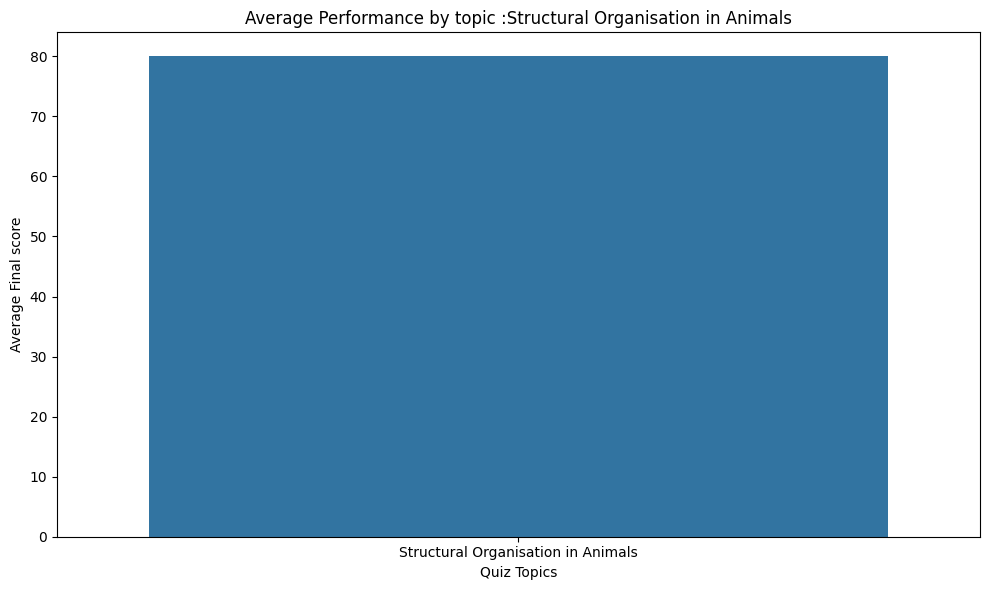

In [220]:
# To visualize overall accuracy over quiz topics
topics=submission_data_df.groupby('quiz_topic')['accuracy'].mean()
# check for multiple topics
mul_topics=submission_data_df['quiz_topic'].nunique()

plt.figure(figsize=(10,6))

if mul_topics >1:
     sns.barplot(x=topics.index,y=topics.values)
     plt.title("Average Performance by topic")
     plt.xlabel('Quiz Topics')
     plt.ylabel('Average Final score')
     plt.xticks(rotation=50,ha='right')
else:
     sns.barplot(x=topics.index,y=topics.values)
     plt.title(f"Average Performance by topic :{topics.index[0]}")
     plt.xlabel('Quiz Topics')
     plt.ylabel('Average Final score')

plt.tight_layout()
plt.show()

#### ----To visualize overall accuracy by correct and incorrect answers----

/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/numpy/lib/stride_tricks.py:536: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = [np.array(_m, copy=False, subok=subok) for _m in args]
/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


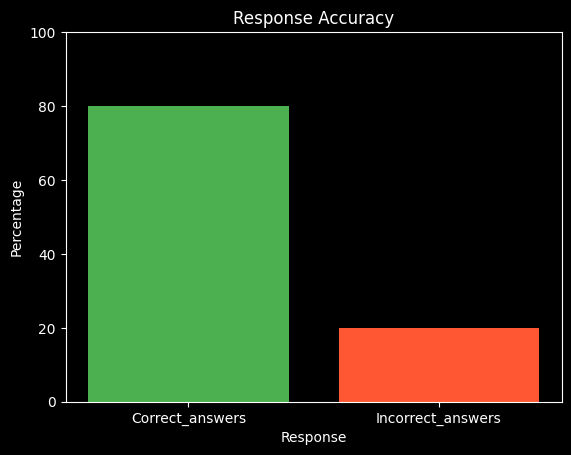

In [323]:
## To visualize overall accuracy by correct and incorrect answers
accuracy = submission_data_df['accuracy']  # accuracy percentage
incorrect = 100 - accuracy[0]  # incorrect percentage

# Bar chart
labels = ['Correct_answers', 'Incorrect_answers']
values = [accuracy, incorrect]

plt.bar(labels, values, color=['#4CAF50', '#FF5733'])

plt.xlabel('Response')
plt.ylabel('Percentage')
plt.title('Response Accuracy')
plt.ylim(0, 100)  # Ensure the y-axis is from 0 to 100
plt.show()

### 2) *********************** Generate Insights ***********************
1. Highlight weak areas : To identify the weak areas 
2. Improvement trends
3. performance gaps for a given user


1. Highlight weak areas
* To highlight the weak areas the key fields to focus are scores,accuracy, difficulty levels
* These features helps in identifying where the student would have struggled

In [247]:
# Set thresholds for analysis
score_threshold =30
accuracy_threshold =70

# Check for the weak areas based on scores and accuracy
def identify_weak_areas(data,score_threshold,accuracy_threshold):
     """
    Identifies potential weak areas based on student performance.

    Args:
        data (pd.DataFrame): DataFrame containing the submitted data 
        score_threshold (int): Minimum score threshold for acceptable performance.
        accuracy_threshold (int): Minimum accuracy threshold for acceptable performance.

    Returns:
        list: A list of strings indicating the identified weak areas.
    """
     weak_areas=[]

     # Check for score performance
     if data['final_score'][0]<score_threshold:
          weak_areas.append("Low score")
     
     # Check for accuracy performance
     if data['accuracy'][0]<accuracy_threshold:
          weak_areas.append("Poor accuracy")

     # Check for mistakes 
     # assuming 10 would be a good value to check for the questions answered wrong
     if data['quiz_max_mistake_count'][0]>10: 
          weak_areas.append("High Mistake Count")
        
     return weak_areas

In [232]:
# Call the function for the analysis
Weak_Areas=identify_weak_areas(submission_data_df,score_threshold,accuracy_threshold)
# Output weak areas
if Weak_Areas:
    print("Weak Areas Identified:", Weak_Areas)
else:
    print("No major weak areas identified.")

No major weak areas identified.



*  ------------From the above result we can infers that this student has performned well and don't have any weak areas to consider for improvement---------

2. Improvement Trends
* It helps in getting insights of how the performance is improving by taking up many quizes 
* Based on the trend can put more efforts in improving the weak areas

##### Visualising the trend with score over time with historical data

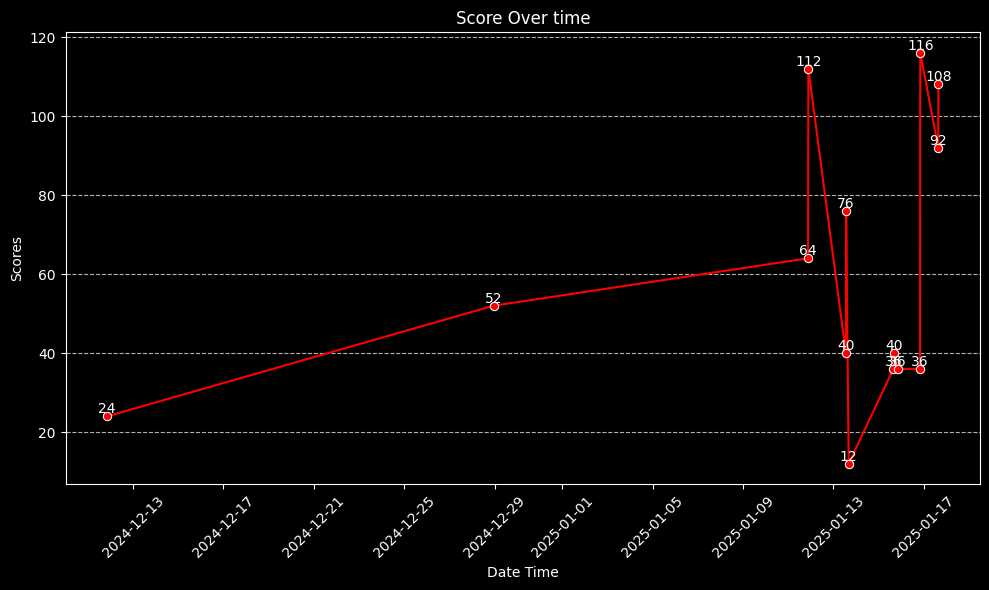

In [280]:
# Set the style
plt.style.use('dark_background')

# Convert to proper datetime format
historical_quiz_data_df['submitted_at']=pd.to_datetime(historical_quiz_data_df['submitted_at'])
plt.figure(figsize=(10,6))
sns.lineplot(data=historical_quiz_data_df,x='submitted_at',y='score',marker='o',color='red')
# Annotate data points with their scores
for x, y in zip(historical_quiz_data_df['submitted_at'],historical_quiz_data_df['score']):
    plt.text(x, y, f'{y}', ha='center', va='bottom', fontsize=10, color='white')
# Customize the plot
plt.title('Score Over time') 
plt.xlabel('Date Time')
plt.ylabel('Scores')
plt.xticks(rotation=45)
sns.set_palette("Set2")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


* The trend plot shows an increasing trend with significant fluctuations in scores towards the end of the period while the performance is improving over time
* The fluctuations might be for various reasons like time the quiz was conducted,health conditions,level of difficulty in the questions,study habits or external events.

##### Visualising the trend with Speed over time with historical data

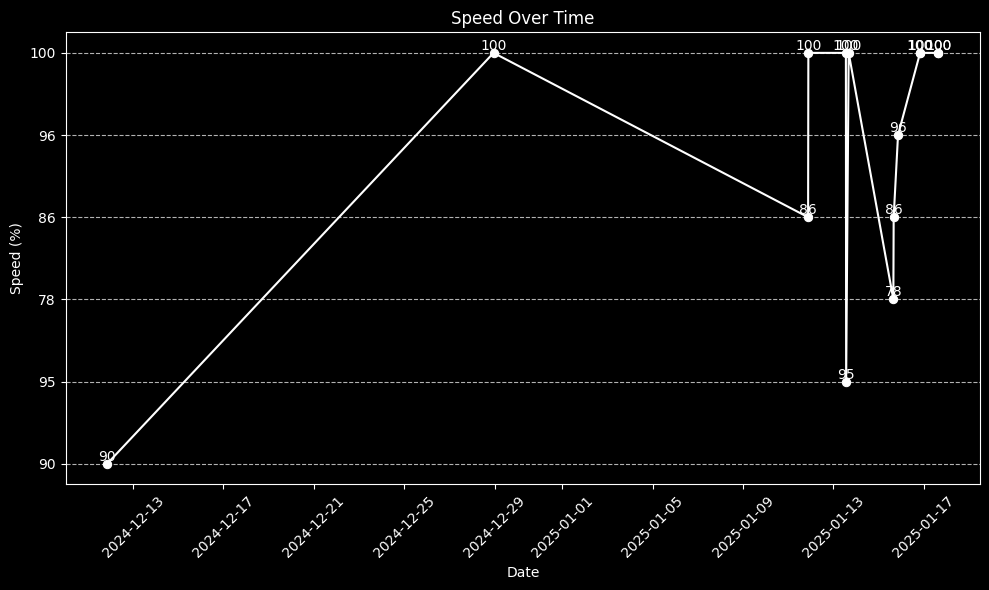

In [302]:
# Plotting Speed Over Time
plt.figure(figsize=(10, 6))
sns.lineplot(data=historical_quiz_data_df, x='submitted_at', y='speed', marker='o', color='white')
# Annotate data points with their scores
for x, y in zip(historical_quiz_data_df['submitted_at'],historical_quiz_data_df['speed']):
    plt.text(x, y, f'{y}', ha='center', va='bottom', fontsize=10, color='white')
plt.title('Speed Over Time')
plt.xlabel('Date')
plt.ylabel('Speed (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


* From the above plot there is a sharp increase in the speed in the begining of the period following there is significant dips in the speed .
* Speed is fluctuating when the quizes taken are in consecutive days and the same day
* But there are several days reaching speed to 100 and others almost on the higher side of speed 

 ### 3) *********************** Personalised Recommendations *********************** 
 * Provide recommendations for the user to improve the performance

In [351]:
# Function to analyse performance
def performation_recommendation_levels(data):
   """
     student performance based on deifferent trophy levels

    Args:
        data (pd.DataFrame): DataFrame containing historical quiz data, 
                         expected to have a column named 'trophy_level'
      
    Returns:
        list: A list of strings, each containing a personalized recommendations.
    """
     recommendations=[]

     # Check performance based on levels 
     levels=data.iloc[-1]['trophy_level']
     if levels==1:      # Assuming 1 = Low
          recommendations.append('Your trophy level is low. Focus on mastering the basics and aim for steady improvement')
     elif levels == 2:  # Assuming 2 = Medium
        recommendations.append("Your trophy level is medium. You're doing well, but try tackling more challenging questions.")
     else:  # Assuming 3 = High
        recommendations.append("You're at a high trophy level. Keep up the great work and focus on advanced and timed practice.")
 
     return recommendations

In [352]:
# Applying the function on the dataset to generate personalized recommendations for Trophy Levels
recommendations = performation_recommendation_levels(historical_quiz_data_df)
for recommendation in recommendations:
    print(recommendation)

You're at a high trophy level. Keep up the great work and focus on advanced and timed practice.


In [362]:
# Analyzing responses to specific questions (via response_map_X columns)
def performation_recommendation_topics(data):
     """
     Generates personalized recommendations based on incorrect answers.

     Args:
      data (pd.DataFrame): DataFrame containing historical quiz data, 
                          expected to have columns starting with 'response_map_'.

     Returns:
      list: A list of strings, each containing a personalized recommendation.
     """
     recommendations=[]
     weak_topics = []
     for i in data.columns:
          if i.startswith('response_map_'):
               incorrect_response=data[i]==0.0 # considering 0 means incorrect
               weak_topics.append(i) if incorrect_response.sum()>0 else None

     if weak_topics:
          recommendations.append(f'Revise the topics that are answered incorrectly to improve the performance: {", ".join(weak_topics)}')
     return recommendations

In [363]:
# Applying the function on the dataset to generate personalized recommendations for Topics
recommendations = performation_recommendation_topics(historical_quiz_data_df)
for recommendation in recommendations:
    print(recommendation)

Revise the topics that are answered incorrectly to improve the performance: response_map_2523, response_map_2529, response_map_2533, response_map_2534, response_map_2535, response_map_2537, response_map_2538, response_map_2541, response_map_2543, response_map_2550, response_map_2553, response_map_2554, response_map_2555, response_map_2557, response_map_2558, response_map_2564, response_map_2565, response_map_2567, response_map_2572, response_map_2576, response_map_2585, response_map_2587, response_map_2589, response_map_2591, response_map_2593, response_map_2598, response_map_2599, response_map_2607, response_map_2610, response_map_2614, response_map_48, response_map_49, response_map_50, response_map_51, response_map_52, response_map_53, response_map_54, response_map_55, response_map_56, response_map_57, response_map_58, response_map_59, response_map_60, response_map_61, response_map_62, response_map_63, response_map_64, response_map_65, response_map_134, response_map_135, response_map

In [364]:
 # Score and speed considerations
 def performation_recommendation_speed(data):
     """
     Generates personalized recommendations based on the user's average speed.

     Args:
      data (pd.DataFrame): DataFrame containing historical quiz data, 
                          expected to have a column named 'speed'.

     Returns:
      list: A list of strings, each containing a personalized recommendation.
  """
     recommendations=[]
     if not pd.api.types.is_integer_dtype(historical_quiz_data['speed']):
          speed=pd.to_numeric(historical_quiz_data['speed'])
     else:
          historical_quiz_data['speed']
     
     if speed.mean()<80:
          recommendations.append("Try improving your speed to answer questions faster. Practice time-based quizzes")
     else:
          recommendations.append(f"Keep up the speed!! You're mean speed : {speed.mean()}")
     return recommendations
          

In [365]:
recommendations = performation_recommendation_speed(historical_quiz_data_df)
for recommendation in recommendations:
    print(recommendation)

Keep up the speed!! You're mean speed : 95.07142857142857


#### *********************** Student Persona ****************************

In [391]:
# Function based on quiz performance
def student_persona(data):
     """
    Defines a student persona based on historical quiz data.

    Args:
        data (pd.DataFrame): DataFrame containing historical quiz data.

    Returns:
        dict: A dictionary representing the student persona.
    """
     latest=data.iloc[-1]
     persona={}
     
     if isinstance(latest['accuracy'], str): 
          latest['accuracy'] = float(latest['accuracy'].replace('%', ''))
     else:
          print("Warning: 'accuracy' column is not of string type. Proceeding without conversion.")

     if latest['accuracy']>=90 and latest['trophy_level']==3:
          persona['Person_type'] = 'The Consistent Achiever'
     elif latest['accuracy'] >= 60 and latest['trophy_level'] == 2:
          persona['Person_type'] = 'Picking up to improve perforance'
     elif latest['accuracy'] < 60 and latest['trophy_level'] == 1:
        persona['Person_type'] = 'The Struggler'
     else:
        persona['Person_type'] = 'The Fast-Thinker'
    
     persona['accuracy'] = latest['accuracy']
     persona['score'] = latest['score']
     persona['trophy_level'] = latest['trophy_level']
    
     return persona

In [393]:
student_persona(historical_quiz_data)

{'Person_type': 'The Fast-Thinker',
 'accuracy': 66.0,
 'score': 24,
 'trophy_level': 3}